In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-03.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.906261,6.944233,50.930842,6.900563,2021-03-01 15:41:01,2021-03-01 16:27:02,46.0,4105.0,41946174,41964922,915.0,NaN,BIKE 22414,679
1,50.930842,6.900563,50.928876,6.900142,2021-03-01 16:34:01,2021-03-01 16:35:02,1.0,221.0,41964922,41966407,7.0,NaN,BIKE 22414,601
2,50.928876,6.900142,50.937211,6.900554,2021-03-01 17:54:02,2021-03-01 18:08:01,14.0,927.0,41966407,41970488,79.0,NaN,BIKE 22414,600
3,50.937211,6.900554,50.944225,6.911160,2021-03-01 18:28:01,2021-03-01 18:46:01,18.0,1078.0,41970488,41972082,20.0,NaN,BIKE 22414,595
4,50.944225,6.911160,50.906063,6.944202,2021-03-01 22:14:02,2021-03-01 23:12:02,58.0,4836.0,41972082,41977369,208.0,NaN,BIKE 22414,606


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

43277

In [14]:
len(out_distances_total)

6212

In [15]:
len(out_rides)

5479

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

8552

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

3139

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

13.0        61
11.0        50
9.0         48
8.0         47
17.0        47
14.0        47
12.0        47
16.0        45
7.0         44
6.0         44
20.0        41
21.0        41
10.0        40
5.0         38
15.0        37
18.0        37
23.0        36
22.0        35
29.0        35
19.0        32
30.0        32
4.0         30
24.0        30
45.0        29
38.0        29
27.0        28
32.0        28
49.0        28
26.0        28
2.0         27
            ..
452148.0     1
4576.0       1
3959.0       1
4253.0       1
7245.0       1
6092.0       1
5370.0       1
5042.0       1
5559.0       1
4275.0       1
7740.0       1
6011.0       1
6262.0       1
5048.0       1
6976.0       1
9481.0       1
6830.0       1
5084.0       1
4442.0       1
5218.0       1
6069.0       1
5313.0       1
5179.0       1
5171.0       1
8459.0       1
5321.0       1
6704.0       1
7191.0       1
7127.0       1
8065.0       1
Name: distance, Length: 5873, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3073

In [23]:
len(out_distances + out_rides)

8552

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

19.761074011599693


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34725 entries, 0 to 34724
Data columns (total 15 columns):
index                   34725 non-null int64
lat_begin               34725 non-null float64
lng_begin               34725 non-null float64
lat_end                 34725 non-null float64
lng_end                 34725 non-null float64
ride_begin              34725 non-null object
ride_end                34725 non-null object
ride_time               34725 non-null float64
distance                34725 non-null float64
uid_begin               34725 non-null int64
uid_end                 34725 non-null int64
standing_before_ride    34725 non-null float64
address                 237 non-null object
name                    34725 non-null object
available_bikes         34725 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 4.0+ MB


In [27]:
df_c['distance'].value_counts()

715.0     26
348.0     25
828.0     24
570.0     24
653.0     24
776.0     23
399.0     23
540.0     23
333.0     22
749.0     22
996.0     22
396.0     22
430.0     22
1173.0    21
599.0     21
486.0     21
1104.0    21
849.0     21
826.0     21
741.0     21
711.0     21
414.0     21
930.0     21
508.0     21
1100.0    21
685.0     21
639.0     20
519.0     20
745.0     20
995.0     20
          ..
8460.0     1
5263.0     1
4755.0     1
5480.0     1
6557.0     1
4177.0     1
4812.0     1
4724.0     1
4474.0     1
3417.0     1
5407.0     1
8950.0     1
5905.0     1
5414.0     1
4412.0     1
6526.0     1
5333.0     1
4676.0     1
5056.0     1
4443.0     1
7059.0     1
7666.0     1
8721.0     1
5199.0     1
5706.0     1
5050.0     1
6503.0     1
4940.0     1
4273.0     1
7159.0     1
Name: distance, Length: 5657, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

9.0      1281
8.0      1281
10.0     1276
11.0     1260
12.0     1248
7.0      1207
14.0     1194
13.0     1156
15.0     1119
16.0     1101
6.0      1032
17.0     1007
18.0      987
19.0      872
20.0      855
21.0      804
22.0      767
24.0      687
23.0      678
5.0       663
25.0      663
26.0      593
27.0      572
28.0      521
29.0      501
30.0      500
31.0      443
32.0      408
33.0      381
34.0      316
         ... 
448.0       1
455.0       1
469.0       1
342.0       1
325.0       1
501.0       1
558.0       1
523.0       1
660.0       1
530.0       1
463.0       1
466.0       1
666.0       1
505.0       1
405.0       1
364.0       1
671.0       1
562.0       1
447.0       1
624.0       1
418.0       1
498.0       1
541.0       1
241.0       1
601.0       1
629.0       1
452.0       1
543.0       1
550.0       1
500.0       1
Name: ride_time, Length: 590, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[17,
 19,
 20,
 52,
 67,
 132,
 155,
 168,
 205,
 208,
 241,
 297,
 339,
 375,
 391,
 401,
 420,
 421,
 432,
 484,
 576,
 687,
 728,
 731,
 758,
 759,
 777,
 801,
 817,
 835,
 869,
 937,
 954,
 1056,
 1057,
 1077,
 1083,
 1114,
 1137,
 1146,
 1168,
 1195,
 1226,
 1272,
 1281,
 1301,
 1318,
 1337,
 1343,
 1443,
 1444,
 1526,
 1531,
 1549,
 1582,
 1595,
 1673,
 1743,
 1753,
 1779,
 1792,
 1812,
 1866,
 1893,
 1901,
 1911,
 2005,
 2074,
 2084,
 2086,
 2114,
 2115,
 2120,
 2142,
 2162,
 2163,
 2169,
 2176,
 2183,
 2208,
 2215,
 2324,
 2354,
 2421,
 2434,
 2481,
 2513,
 2515,
 2538,
 2540,
 2542,
 2559,
 2601,
 2647,
 2758,
 2798,
 2876,
 2909,
 2937,
 2938,
 3004,
 3010,
 3028,
 3062,
 3063,
 3065,
 3071,
 3086,
 3116,
 3120,
 3135,
 3161,
 3166,
 3203,
 3212,
 3270,
 3275,
 3285,
 3317,
 3359,
 3363,
 3395,
 3401,
 3438,
 3440,
 3522,
 3530,
 3602,
 3617,
 3618,
 3641,
 3662,
 3733,
 3750,
 3757,
 3766,
 3846,
 3919,
 4073,
 4103,
 4148,
 4151,
 4185,
 4190,
 4214,
 4215,
 4218,
 4244,
 4

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
17,20,50.928176,6.935866,50.926986,6.938140,2021-03-19 12:15:02,2021-03-19 13:28:02,73.0,207.0,42510058,42513635,130.0,NaN,BIKE 22414,815
19,22,50.925506,6.942196,50.927639,6.943080,2021-03-19 18:16:01,2021-03-19 19:00:02,44.0,245.0,42515719,42526628,272.0,NaN,BIKE 22414,781
20,24,50.927400,6.943394,50.925373,6.944337,2021-03-24 16:50:01,2021-03-24 19:11:02,141.0,235.0,42527323,42686598,7063.0,NaN,BIKE 22414,764
52,62,50.956598,6.904369,50.954105,6.904726,2021-03-04 09:20:02,2021-03-04 09:47:01,27.0,278.0,42046490,42061412,848.0,NaN,BIKE 22819,633
67,80,50.940286,6.954011,50.941870,6.957383,2021-03-11 15:29:01,2021-03-11 15:34:02,5.0,295.0,42280337,42282905,88.0,NaN,BIKE 22819,785
132,157,50.955319,6.956574,50.952974,6.958222,2021-03-16 22:07:01,2021-03-16 22:52:01,45.0,285.0,42434600,42437694,124.0,NaN,BIKE 23650,817
155,185,50.992484,6.957606,50.990543,6.959670,2021-03-29 20:22:01,2021-03-29 20:26:01,4.0,260.0,42852101,42889694,1364.0,NaN,BIKE 23650,708
168,203,50.940298,7.021111,50.942480,7.019821,2021-03-23 18:04:01,2021-03-23 18:09:02,5.0,259.0,42647060,42647580,6.0,NaN,BIKE 22382,710
205,250,50.913379,6.927937,50.913375,6.925016,2021-03-17 21:06:01,2021-03-17 21:11:02,5.0,205.0,42464975,42466746,63.0,NaN,BIKE 210206,794
208,254,50.951066,6.960541,50.950805,6.963664,2021-03-19 15:22:01,2021-03-19 15:35:02,13.0,221.0,42515115,42519594,119.0,NaN,BIKE 210206,779


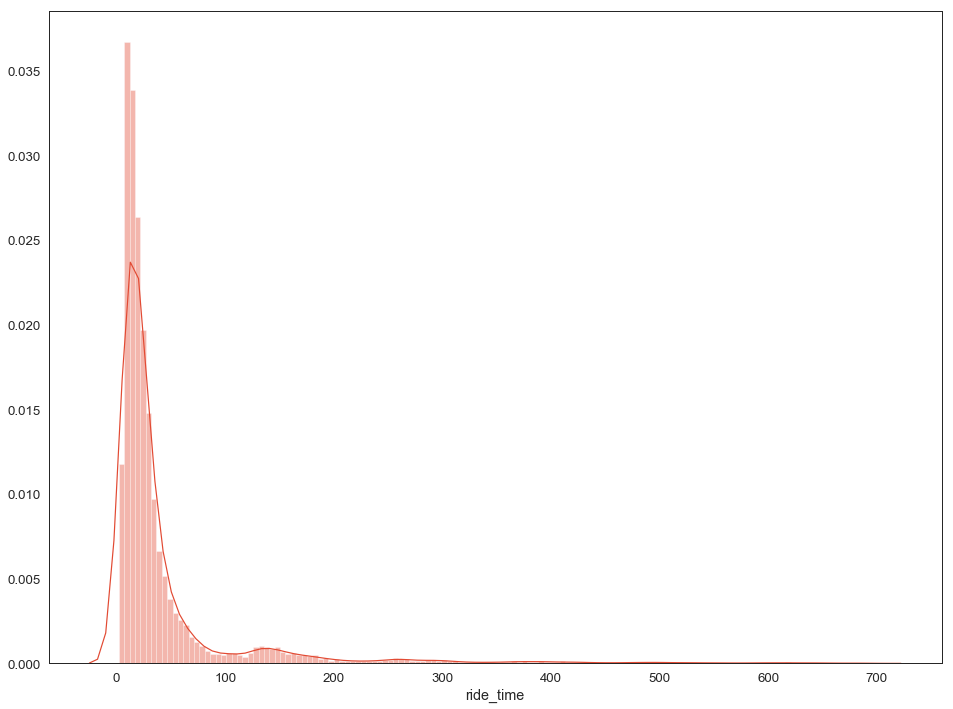

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

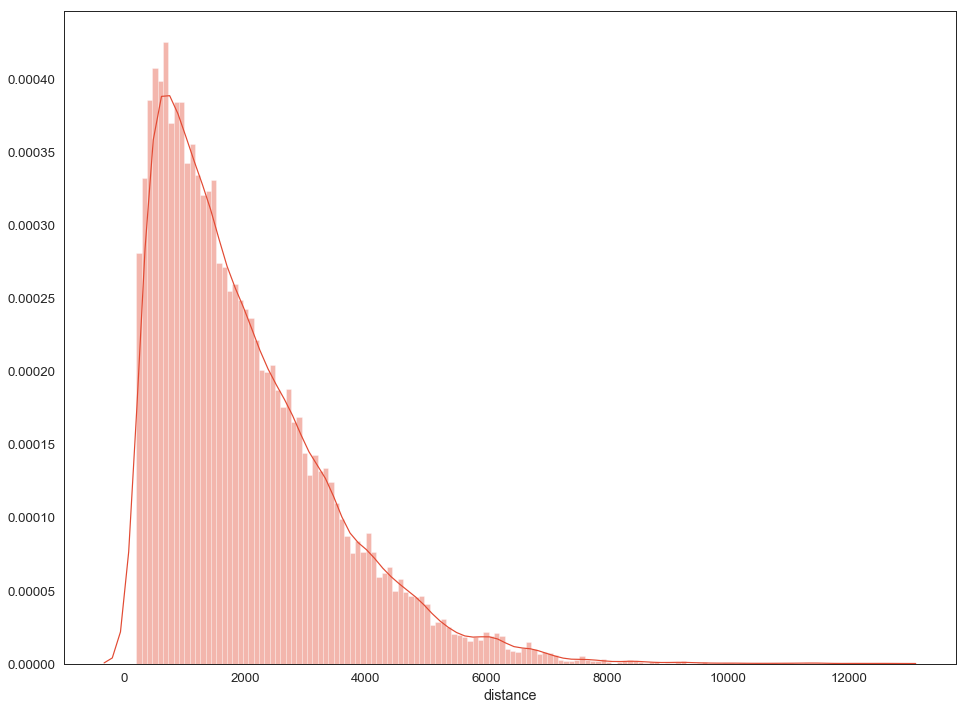

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
33,38,50.931003,6.917636,50.938539,6.954092,2021-03-28 12:40:01,2021-03-28 13:18:03,38.0,2689.0,42810003,42830598,958.0,Dürener Straße 132,BIKE 22414,717
266,369,50.936727,6.908720,50.954329,6.921020,2021-03-01 13:58:02,2021-03-01 15:00:02,62.0,2139.0,41925611,41961416,838.0,Köln - Aachener Str. 413,BIKE 22257,673
267,370,50.954329,6.921020,50.956710,6.923699,2021-03-01 15:37:01,2021-03-01 16:22:02,45.0,325.0,41961416,41964273,37.0,Subbelrather Straße Haltestelle,BIKE 22257,638
268,371,50.956710,6.923699,50.968332,6.939876,2021-03-01 17:09:01,2021-03-01 17:41:01,32.0,1719.0,41964273,41969494,47.0,ehrenfeld gürtel / röntgen straße,BIKE 22257,594
359,480,50.943711,6.962197,50.938371,6.888034,2021-03-01 18:49:02,2021-03-01 19:58:02,69.0,5232.0,41960499,41974522,215.0,Konrad-Adenauer-Ufer 3,BIKE 21226,628
363,486,50.982453,6.947788,50.974430,6.949229,2021-03-07 13:50:01,2021-03-07 14:10:01,20.0,898.0,42101253,42157434,2729.0,Neusser Str. 284-286,BIKE 21226,704
367,490,50.972374,6.946496,50.954971,6.904372,2021-03-09 19:51:01,2021-03-10 07:26:01,695.0,3529.0,42189077,42229159,1519.0,"Köln, Eckewartstraße 26",BIKE 21226,704
368,493,50.954564,6.910634,50.933985,6.922967,2021-03-12 11:22:02,2021-03-12 18:35:01,433.0,2447.0,42246951,42305504,492.0,"Köln, Venloer Straße/ Leyendecker Straße",BIKE 21226,814
370,497,50.924013,6.923229,50.924885,6.929437,2021-03-16 10:46:02,2021-03-16 11:16:01,30.0,446.0,42406164,42418572,853.0,"Kerpener Str. 55, 50937 Köln",BIKE 21226,782
378,510,50.944812,6.951114,50.963600,6.899667,2021-03-29 18:14:02,2021-03-30 01:14:02,420.0,4167.0,42845454,42885138,1134.0,Altengrabengäßchen 17,BIKE 21226,728


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
157,187,50.985261,6.961291,50.990221,6.959492,2021-03-30 18:20:01,2021-03-30 18:25:01,5.0,566.0,42899367,42933560,704.0,NaN,BIKE 23650,700
158,188,50.990221,6.959492,50.985264,6.961295,2021-03-31 06:31:02,2021-03-31 06:35:02,4.0,566.0,42933560,42954740,726.0,NaN,BIKE 23650,600
624,790,50.968924,6.960072,50.987130,6.913150,2021-03-05 08:09:01,2021-03-05 08:36:01,27.0,3860.0,42076686,42087807,784.0,NaN,BIKE 21921,718
625,791,50.987130,6.913150,50.968920,6.960070,2021-03-05 18:05:01,2021-03-05 18:53:02,48.0,3860.0,42087807,42106762,569.0,NaN,BIKE 21921,772
1937,2443,50.912662,6.940602,50.932644,6.947309,2021-03-13 15:56:01,2021-03-13 16:12:01,16.0,2272.0,42343875,42345543,36.0,NaN,BIKE 23645,795
1938,2444,50.932644,6.947309,50.951224,6.933842,2021-03-13 19:42:02,2021-03-13 20:27:02,45.0,2272.0,42345543,42352789,210.0,NaN,BIKE 23645,770
3162,4092,50.957150,6.899170,50.986325,6.886034,2021-03-26 11:18:01,2021-03-26 11:36:02,18.0,3373.0,42742668,42746211,101.0,NaN,BIKE 22481,738
3163,4093,50.986325,6.886034,50.957439,6.900672,2021-03-26 11:47:02,2021-03-26 12:09:02,22.0,3373.0,42746211,42747553,11.0,NaN,BIKE 22481,738
3419,4423,50.953271,6.902247,50.954846,6.909623,2021-03-01 14:02:01,2021-03-01 14:21:01,19.0,546.0,41946742,41960952,806.0,NaN,BIKE 21885,678
3420,4424,50.954846,6.909623,50.954362,6.901871,2021-03-01 14:21:01,2021-03-01 14:27:02,6.0,546.0,41960952,41961563,0.0,NaN,BIKE 21885,642


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
189,230,50.935872,6.941617,50.942438,7.002530,2021-03-06 15:37:01,2021-03-06 15:44:01,7.0,4331.0,42124619,42132043,171.0,NaN,BIKE 210206,746,4000.0
209,255,50.950805,6.963664,50.968684,6.975612,2021-03-25 17:43:02,2021-03-25 17:46:01,3.0,2158.0,42519594,42722949,8768.0,NaN,BIKE 210206,749,1500.0
1240,1522,50.942900,6.956490,50.946986,6.922481,2021-03-08 13:02:01,2021-03-08 13:04:01,2.0,2426.0,42184230,42184249,0.0,Fenloher Straße 249,BIKE 22967,754,1500.0
3523,4544,50.944444,6.999031,50.918760,6.969639,2021-03-27 12:25:02,2021-03-27 12:28:02,3.0,3522.0,42792254,42793427,18.0,NaN,BIKE 23687,729,1500.0
4281,5442,50.998095,6.902277,50.953071,7.013423,2021-03-07 00:55:01,2021-03-07 01:15:02,20.0,9256.0,42099396,42147328,1999.0,NaN,BIKE 22363,708,9000.0
4513,5737,50.952365,6.995197,50.911454,6.989933,2021-03-17 15:58:01,2021-03-17 16:06:01,8.0,4565.0,42421240,42456435,1626.0,NaN,BIKE 22708,770,4000.0
5984,7506,50.972119,6.948424,50.973146,6.911607,2021-03-13 10:12:02,2021-03-13 10:15:01,3.0,2581.0,42318748,42335196,979.0,NaN,BIKE 21989,757,1500.0
7040,8756,50.959781,6.995908,50.965714,6.905017,2021-03-22 19:08:02,2021-03-22 19:12:01,4.0,6401.0,42615725,42616323,13.0,NaN,BIKE 23699,741,4000.0
8452,10436,50.919262,6.964575,50.950235,6.981218,2021-03-20 18:43:01,2021-03-20 18:45:01,2.0,3637.0,42547386,42557204,260.0,NaN,BIKE 22306,744,1500.0
9547,11773,50.937983,6.875369,50.981746,6.945226,2021-03-02 01:36:02,2021-03-02 01:50:01,14.0,6903.0,41922935,41979603,1536.0,NaN,BIKE 22756,673,6500.0


In [46]:
len(unmatched_distances)

25

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                          34465
Heisterbachstraße 29                             3
Köln - Friedrich-Karl-Str. 261                   3
Gottesweg 54                                     2
Kirchweg                                         1
Deutzer Freiheit 80, 50679 Köln                  1
Merheimer Straße 428                             1
köln messe deutz bhf                             1
Ubierring 28                                     1
taunusplatz 12                                   1
Schulze-Delitzsch-Straße 83, 50968 Köln          1
Gutenbergstraße 56                               1
Grünstraße Haltelle                              1
Bachenerstraße 115                               1
Köln - Alte Escher straße                        1
ehrenfeld gürtel / röntgen straße                1
Widdersdorfer Straße & Oskar-Jäger-Straße        1
Vor den Siebenburgen 70                          1
Köln - Kasparstraße 2                            1
Heisterbachstraße 22           

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-03.csv', sep=';', index=False) 

In [52]:
len(df_c)

34700